# Programmierübung: Der Page Rank - Algorithmus

## Modul: Lineare Algebra und Geometrie (lag)

## FS 2020

## Prof. Dr. Andreas Vogt

Das folgende Notebook ist von Ihnen auszufüllen. Der Abgabetermin ist am 3. April 2020. Es wird sowohl die Korrektheit der Programme als auch die Darstellung bewertet. Wie genau die Note in die Erfahrungsnote bzw. die Endnote des Moduls einfliesst, ist zur Zeit noch nicht ganz klar.

Wir laden zuerst die für diese Übung benötigten Module. **Hinweis:** Wir benutzen das Modul `networkx` für die graphische Darstellung von Graphen. Gegebenenfalls müssen Sie dies noch nachinstallieren.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import scipy as scipy

## Adjazenz- und Inzidenzmatrix

Recherchieren Sie, was die Adjazenzmatrix bzw. die Inzidenzmatrix eines Graphen $G$ ist. Stellen Sie beide Konzepte in sauberem LaTeX dar. Illustrieren Sie beide Konzepte an Hand eines Beispiels.

Der folgende Graph sei nun gegeben:

<img src="Graph1.png" width=600>

Definieren Sie zuerst seine Inzidenzmatrix $E$ als Numpy-array.

In [16]:
nodes = [0, 1, 2, 3, 4, 5, 6, 7]
edges = [[0, 1], [0, 6], [0, 7], 
         [1, 2], [1, 7], 
         [2, 1], [2, 7], 
         [3, 5], [3, 7], 
         [4, 5], 
         [5, 6], 
         [6, 5], 
         [7, 6]]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

incidence_matrix = -nx.incidence_matrix(G, oriented=True)

E = np.array(incidence_matrix.toarray())



Schreiben Sie eine Funktion, die als Eingabe die Inzidenzmatrix eines Graphen erhält und die entsprechende Adjazenzmatrix ausgibt.

In [17]:
def turn_im_into_am( E ):
    edge_starting_points = np.where(E.T > 0)
    edge_end_points = np.where(E.T < 0)

    g = nx.DiGraph()

    for i in range(len(E)):
        g.add_node(i)

    for i in range(len(edge_starting_points[1])):
        foo = edge_starting_points[1][i]
        bar = edge_end_points[1][i]
        g.add_edge(foo, bar)

    am = nx.adjacency_matrix(g)

    return np.array(am.toarray())

Zur Visualisierung Ihrer Graphen stellen wir Ihnen eine Funktion zur Verfügung. 

In [18]:
def plot_graph( A, knoten_gewichte=None ):
    """
    Funktion zur graphischen Darstellung eines Graphen. 
    Benutzt das 'spring layout', eventuell muss die Funktion mehrere Male ausgeführt werden, bis eine schöne Darstellung 
    des Graphen vorliegt.
    
    Arguments: 
    A -- Adjazenzmatrix (shape (n_knoten,n_knoten))
    knoten_gewichte -- Liste mit Gewichte für jeden Knoten im Graphen (bei None erhalten alle Knoten die gleichen Gewichte)
    """
    
    if knoten_gewichte is None:
        knoten_gewichte = np.array( [1] * A.shape[0] )
    
    assert( len( knoten_gewichte) == A.shape[0] )
        
    knoten_gewichte = knoten_gewichte / np.mean( knoten_gewichte )
    
    plt.figure(figsize=(8,8))
    G = nx.DiGraph( A )
    pos = nx.layout.spring_layout(G)
    options = {
    'node_color': '#dd0000',
    'node_size': knoten_gewichte*2500,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    }
        
    nx.draw_networkx(G, pos, arrows=True, **options )
    plt.axis("off")
    plt.show()

Lassen Sie von ihrer Funktion die Ajazenzmatrix $A$ zu der oben eingegebenen Inzidenzmatrix $E$ berechnen und visualisieren Sie den zugehörigen Graphen mit der obigen Funktion.

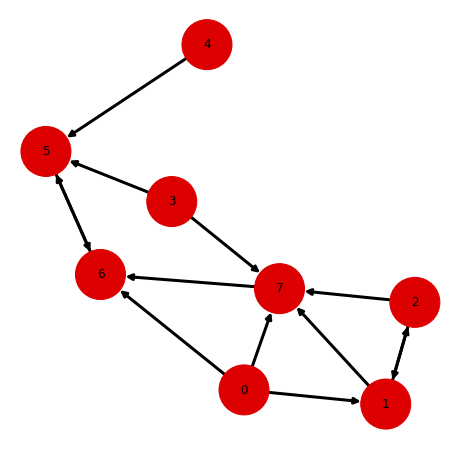

In [19]:
A = turn_im_into_am(E)
plot_graph(A)

Schreiben SIe eine Funktion, die als Eingabe die Adjazenzmatrix eines Graphen erhält und die entsprechende Inzidenzmatrix ausgibt.

In [20]:
def turn_am_into_im(A):
    g = nx.DiGraph(A)

    im = -nx.incidence_matrix(g, oriented=True)

    return np.array(im.toarray())


## Der PageRank-Algorithmus

Schreiben Sie eine Funktion, die als Eingabe die Inzidenzmatrix eines Graphens erhält und die zugehörige Link-Matrix $P$ ausgibt.

In [33]:
def create_lm_from_im(im):
    am = turn_im_into_am(im)
    
    foo = np.sum(am, axis=1, dtype=float)
    
    for i in foo:
        i = 1/i
        
    print(foo)
    
    amt = am.T
    
    



Schreiben Sie eine Funktion, die als Eingabe die Inzidenzmatrix eines Graphens erhält und als Ausgabe den Vektor $v$ mit $|v|=1$ ausgibt, der die Bedeutung der Webseiten erhält. Verwenden Sie $\alpha=0.85$.

Schreiben Sie eine Funktion, die als Eingabe die Inzidenzmatrix eines Graphens erhält und den zugehörigen Graphen plottet, wobei die Grösse der Knoten proportional zu ihrer Bedeutung sein soll.

In [34]:
create_lm_from_im(E)


[3. 2. 2. 2. 1. 1. 1. 1.]
